In [15]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import os
import six

In [32]:
None == 'shop'

False

In [2]:
os.getcwd()

'/Users/kas-kir/DMIA/hat_game/model'

Добавить метрику:
0. Проверять на базовом датасете топ-слов и смотреть что уверенность модели не падает
1. Сколько было запросов? и сколько раз модель выдавала пустой список?
2. Analogies
3. Similarities and cosine_similarities
4. Gensim loss

- https://stackoverflow.com/questions/54888490/gensim-word2vec-print-log-loss
5. __log_accuracy__
- https://gist.github.com/niitsuma/6cd8ef5d8552309c8018e863fda2154b

6. log_evaluate_word_pairs
- https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.log_evaluate_word_pairs


В word2vec есть параметр compute_loss
- https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

### Metrics 

1. Similarity

Все для Нептуна
- https://docs.neptune.ai/migration-guide
- https://colab.research.google.com/github/neptune-ai/examples/blob/master/how-to-guides/organize-ml-experimentation/notebooks/Organize_ML_runs.ipynb#scrollTo=_7W-pQ1g27u9
- https://docs.neptune.ai/how-to-guides/experiment-tracking/organize-ml-experiments
- https://neptune.ai/blog/neptune-new

In [380]:
# накидать 20-50 пар, сравнить и усреднить оценки

print('last_model', ' prev_model', '  diff')
pairs = [('france', 'spain'), ('king', 'queen'), ('bird', 'sea'), ('woman', 'man')]
for p in pairs:
    res1 = model.wv.similarity(p[0], p[1])
    res2 = model2.wv.similarity(p[0], p[1])
    diff = round(res1-res2, 2)
    print(res1, res2, diff, p)

last_model  prev_model   diff
0.43596354 0.42898005 0.01 ('france', 'spain')
0.41159803 0.40205553 0.01 ('king', 'queen')
0.17826882 0.1549069 0.02 ('bird', 'sea')
0.66646004 0.56664366 0.1 ('woman', 'man')


In [376]:
round(0.43596354-0.42898005, 3)

0.007

2. Взять готовые сравнения из gensim
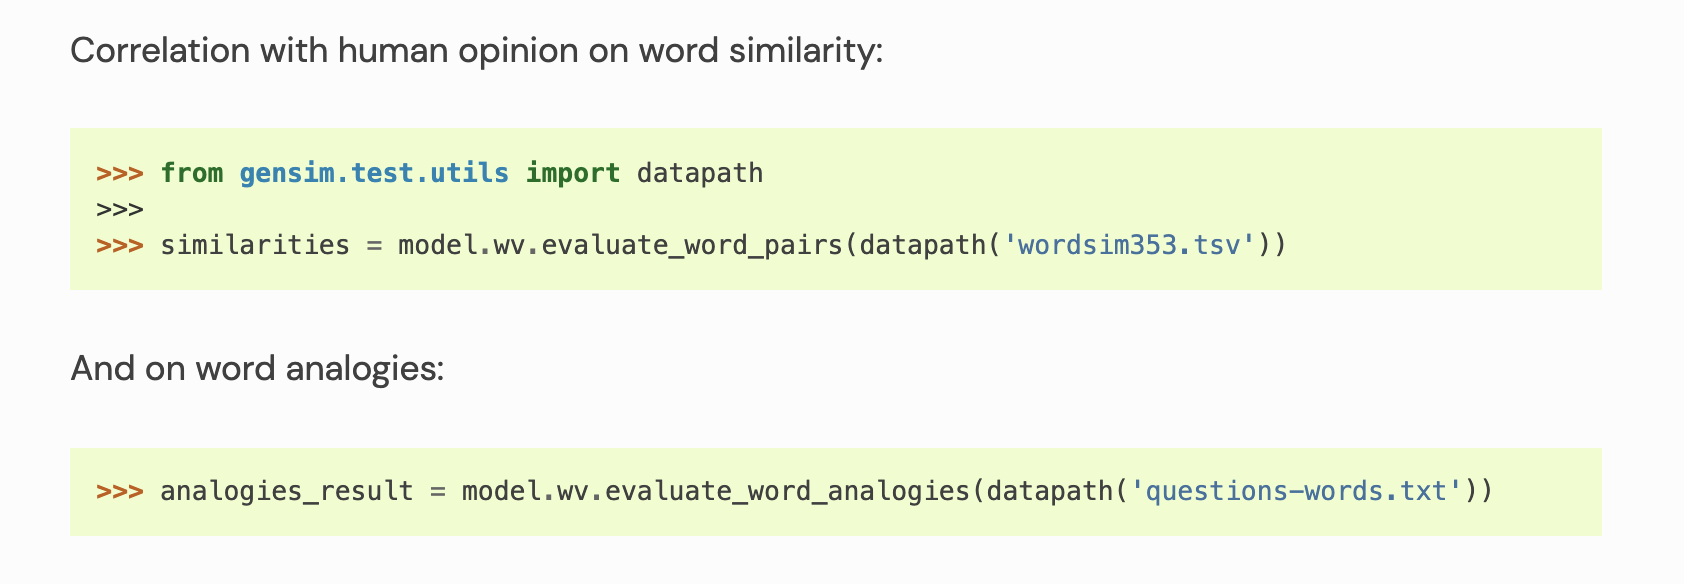

In [33]:
spacy2_lemma = KeyedVectors.load('saved_models/spacy2_simple_lemma.model', mmap='r').wv
spacy2 = KeyedVectors.load('old_models/spacy2.model', mmap='r').wv
skipgram_explain = KeyedVectors.load_word2vec_format('saved_models/skipgram_explain.bin', binary=True)
ft_skipgram = KeyedVectors.load_word2vec_format('saved_models/ft_skipgram.bin', binary=True)

In [37]:
print('Evaluate word pairs')
print('spacy2_lemma', spacy2_lemma.evaluate_word_pairs(datapath('wordsim353.tsv'))[0][0])
print('spacy2', spacy2.evaluate_word_pairs(datapath('wordsim353.tsv'))[0][0])
print('skipgram_explain', skipgram_explain.evaluate_word_pairs(datapath('wordsim353.tsv'))[0][0])
print('ft_skipgram', ft_skipgram.evaluate_word_pairs(datapath('wordsim353.tsv'))[0][0])

Evaluate word pairs
spacy2_lemma 0.6382962595977136
spacy2 0.6307670653424937
skipgram_explain 0.6222764961146606
ft_skipgram 0.614975487714168


In [40]:
print('Analogies')
print('spacy2_lemma', spacy2_lemma.evaluate_word_analogies(datapath('questions-words.txt'))[0])
print('spacy2', spacy2.evaluate_word_analogies(datapath('questions-words.txt'))[0])
print('skipgram_explain', spacy2_lemma.evaluate_word_analogies(datapath('questions-words.txt'))[0])
print('spacy2_lemma', spacy2_lemma.evaluate_word_analogies(datapath('questions-words.txt'))[0])

Analogies
spacy2_lemma 0.3484019400572068
spacy2 0.21792050612020356
skipgram_explain 0.3484019400572068
spacy2_lemma 0.3484019400572068


## Фишки

- Кэшировать слова, которые уже показывал
- Перевзвешивать на новые данные

- использовать предобработку точно такую же как у хоста

- word2vec cbow

- больше epochs (30)
- использовать negative samples при обучении

- искать только из 7к слов последнего бакета

### Similarity
- dataset https://github.com/AdrienGuille/DistributionalSemantics/blob/master/evaluation_data/wordsim353.tsv

In [11]:
# last_model_28_06 = KeyedVectors.load('saved_models/spacy2.model', mmap='r')

# path = '/Users/kas-kir/DMIA/hat_game_fasttext/model/saved_models/'
# ft_28_06 = KeyedVectors.load_word2vec_format(path+'fasttext_skipgram.bin', binary=True)
cbow_29_06 = KeyedVectors.load_word2vec_format(path+'cbow.bin', binary=True)

In [52]:
w1 = ['amazing']
last_skipgram2.most_similar(positive=w1, topn=5)

[('fantastic', 0.7634009718894958),
 ('amazingly', 0.7465938925743103),
 ('awesome', 0.7349655628204346),
 ('great', 0.7300308346748352),
 ('love', 0.7106459140777588)]

In [24]:
cbow_similarities = fasttext_cbow.evaluate_word_pairs(datapath('wordsim353.tsv'))
cbow_similarities

((0.34860470574302393, 5.2489159352907364e-11),
 SpearmanrResult(correlation=0.3259869682057852, pvalue=9.83906919022863e-10),
 5.099150141643059)

In [21]:
sg_similarities = fasttext_skipgram.evaluate_word_pairs(datapath('wordsim353.tsv'))
sg_similarities 

((0.4470301883779947, 7.316707292205814e-18),
 SpearmanrResult(correlation=0.4271124717339264, pvalue=2.7546173146238056e-16),
 5.099150141643059)

In [11]:
similarities = gensim_model_wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
similarities

((0.45561994448806103, 4.371734359537941e-19),
 SpearmanrResult(correlation=0.4431323978165186, pvalue=5.0107628235134274e-18),
 2.26628895184136)

In [10]:
spacy_similarities = spacy.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
spacy_similarities 

((0.5089694479178337, 6.1624497344089394e-24),
 SpearmanrResult(correlation=0.5277031644791443, pvalue=6.507937566898919e-26),
 3.1161473087818696)

In [13]:
spacy_stop_similarities = spacy_stop.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
spacy_stop_similarities 

((0.502856280310848, 2.5624887378720082e-23),
 SpearmanrResult(correlation=0.5086633724449724, pvalue=6.622749287239479e-24),
 3.1161473087818696)

In [38]:
last_similarities = last_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities 

((0.590194786280256, 4.848402436679727e-34),
 SpearmanrResult(correlation=0.6148123787576926, pvalue=1.471449495243492e-37),
 1.41643059490085)

In [57]:
last_similarities2 = last_model2.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities2

((0.6091786161253182, 1.0000883843572831e-36),
 SpearmanrResult(correlation=0.6345787321376046, pvalue=1.289177322258429e-40),
 1.41643059490085)

In [4]:
last_similarities3 = last_model3.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities3

((0.6210458698687333, 1.68684864393195e-38),
 SpearmanrResult(correlation=0.6447506391615838, pvalue=2.8088751359398778e-42),
 1.41643059490085)

In [12]:
last_similarities4 = last_model4.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities4

((0.615887712365984, 1.0161795432118097e-37),
 SpearmanrResult(correlation=0.6365710853399331, pvalue=6.162133184927241e-41),
 1.41643059490085)

In [4]:
last_similarities_26_06 = last_model_26_06.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities_26_06

((0.6404391739787357, 1.4472929115903458e-41),
 SpearmanrResult(correlation=0.6622733528305129, pvalue=2.7088963434909415e-45),
 1.41643059490085)

In [4]:
last_similarities_28_06 = last_model_28_06.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_similarities_28_06

((0.6410145098437914, 8.92636653815783e-42),
 SpearmanrResult(correlation=0.6668610326088196, pvalue=3.026527707434031e-46),
 1.13314447592068)

#### _Fasttext_

In [45]:
last_skipgram_similarities = last_skipgram.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram_similarities 

((0.6100017575841585, 1.932824555478077e-36),
 SpearmanrResult(correlation=0.6141882663564202, pvalue=4.727294580694855e-37),
 2.5495750708215295)

In [54]:
last_skipgram2_similarities = last_skipgram2.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram2_similarities 

((0.600562531417264, 4.287545933574489e-35),
 SpearmanrResult(correlation=0.6051171928091428, pvalue=9.734901500204003e-36),
 2.5495750708215295)

In [7]:
last_skipgram3_similarities = last_skipgram3.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram3_similarities 

((0.6057663379648084, 7.865350658803622e-36),
 SpearmanrResult(correlation=0.6269712252038357, pvalue=5.6147601368935323e-39),
 2.5495750708215295)

In [10]:
last_skipgram4_similarities = last_skipgram4.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram4_similarities

((0.6061261371233941, 5.549263470099651e-36),
 SpearmanrResult(correlation=0.6148241837997676, pvalue=3.0003929575714923e-37),
 2.26628895184136)

In [7]:
last_skipgram_26_06_similarities = last_skipgram_26_06.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram_26_06_similarities

((0.6093439119859432, 1.1946914443358928e-36),
 SpearmanrResult(correlation=0.6213552512072258, pvalue=1.9337648563416926e-38),
 1.69971671388102)

In [5]:
last_skipgram_28_06_similarities = last_skipgram_28_06.evaluate_word_pairs(datapath('wordsim353.tsv'))
last_skipgram_28_06_similarities

((0.6300348383016543, 8.773566122327861e-40),
 SpearmanrResult(correlation=0.6319218115635514, pvalue=4.420702797912708e-40),
 1.69971671388102)

##### _CBOW_

In [12]:
cbow_29_06_sim = cbow_29_06.evaluate_word_pairs(datapath('wordsim353.tsv'))
cbow_29_06_sim

((0.5290790813140481, 1.4450009171631784e-26),
 SpearmanrResult(correlation=0.522307045039354, pvalue=8.067609517711617e-26),
 1.13314447592068)

## Analogy
- dataset https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/datasets/questions-words.txt

In [29]:
analogies_cbow = fasttext_cbow.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_cbow[0]

0.30589123867069484

In [30]:
analogies_skipgram = fasttext_skipgram.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_skipgram[0]

0.32137462235649544

In [31]:
analogies_baseline = gensim_model_wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_baseline[0]

0.23834727676284787

In [32]:
analogies_spacy = spacy.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_spacy[0]

0.24288164665523157

In [33]:
analogies_spacy_stop = spacy_stop.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_spacy_stop[0]

0.2520100898628409

In [39]:
analogies_last = last_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last[0]

0.2602848101265823

In [58]:
analogies_last2 = last_model2.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last2[0]

0.25726409666283084

In [5]:
analogies_last3 = last_model3.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last3[0]

0.2517557689551383

In [13]:
analogies_last4 = last_model4.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last4[0]

0.24896087143471407

In [5]:
analogies_last_26_06 = last_model_26_06.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_26_06[0]

0.22973161867486722

In [6]:
analogies_last_28_06 = last_model_28_06.wv.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_28_06[0]

0.24412047861367075

#### _Fasttext_

In [48]:
analogies_last_skipgram = last_skipgram.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram[0]

0.21478432074458564

In [55]:
analogies_last_skipgram2 = last_skipgram2.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram2[0]

0.18599076704545456

In [8]:
analogies_last_skipgram3 = last_skipgram3.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram3[0]

0.18412642045454544

In [14]:
analogies_last_skipgram4 = last_skipgram4.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram4[0]

0.1924715909090909

In [8]:
analogies_last_skipgram_26_06 = last_skipgram_26_06.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram_26_06[0]

0.16272735260521923

In [7]:
analogies_last_skipgram_28_06 = last_skipgram_28_06.evaluate_word_analogies(datapath('questions-words.txt'))
analogies_last_skipgram_28_06[0]

0.20254051686377572

##### _CBOW_

In [14]:
# cbow_29_06_an = cbow_29_06.evaluate_word_analogies(datapath('questions-words.txt'))
cbow_29_06_an[0]

0.30343525858814646

Как метрику проверки еще можно использовать:

- cosine_similarities
- distance, distances 
-https://radimrehurek.com/gensim/models/fasttext.html#gensim.models.fasttext.FastTextKeyedVectors.cosine_similarities

- available analogy dataset https://aclweb.org/aclwiki/Analogy_(State_of_the_art)

### Accuracy

In [9]:
acc_skipgram_28_06 = last_skipgram_28_06.log_accuracy(datapath('questions-words.txt'))
# acc_skipgram_28_06[0]

TypeError: string indices must be integers